# Sentiment analysis

In this notebook, we will apply the DistillBERT sentiment analysis model to the clean dataset and save the result. 

### Imports

In [43]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import scipy 
from scipy import stats 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Add the project root directory (not src) to sys.path
sys.path.append(os.path.abspath("../data/"))

# Now import the DataLoader class
from data_loading import DataLoader

raw = '../../data/RAW/'
clean = '../../data/CLEAN'

In [3]:
# Add the directory containing the script to sys.path
sys.path.append(os.path.abspath("../model"))

## Load the data

In [72]:
SentimentAnalysis = pd.read_csv(clean + "/sentiment.csv") 
SentimentAnalysis.set_index("Wikipedia movie ID",inplace=True)
SentimentAnalysis.head()

,name,sadness,joy,love,anger,fear,surprise
Wikipedia movie ID,,,,,,,
975900,Ghosts of Mars,0.166889,0.007635,0.003000,0.104745,0.714015,0.003717
6631279,Little city,0.998778,0.000179,0.000163,0.000604,0.000173,0.000103
77856,Mary Poppins,0.019706,0.323026,0.174988,0.456798,0.023313,0.002169
21926710,White on Rice,0.002686,0.973673,0.001442,0.018248,0.003304,0.000647
156558,Baby Boy,0.382242,0.013167,0.001626,0.588319,0.014060,0.000586


In [74]:
#for col in SentimentAnalysis.columns :
#    SentimentAnalysis[col] = stats.zscore(SentimentAnalysis[col]) 

In [76]:
MovieClassif = pd.read_csv(clean + "/classification_result/LLM_result_binary.csv")
MovieClassif.set_index("Wikipedia movie ID",inplace=True)
MovieClassif.shape

(17064, 2)

In [77]:
MovieClassif.head()

,Result,Prediction
Wikipedia movie ID,,
975900,Violent,1.0
6631279,Non-violent,-1.0
77856,Non-violent,-1.0
21926710,Non-violent,-1.0
156558,Violent,1.0


In [85]:
pca = PCA(n_components=3)
pca.fit(SentimentAnalysis.drop(["name"],axis=1))

PCA(n_components=3)

In [86]:
SentimentPCA = pca.transform(SentimentAnalysis.drop(["name"],axis=1))

In [87]:
SentimentPCA = pd.DataFrame(SentimentPCA,index=SentimentAnalysis.index)

In [88]:
SentimentPCA["class"] = MovieClassif["Prediction"]

In [89]:
SentimentPCA

,0,1,2,class
Wikipedia movie ID,,,,
975900,0.545762,-0.245364,0.079419,1.0
6631279,0.284904,0.372825,0.951042,-1.0
77856,-0.106644,0.267710,-0.089017,-1.0
21926710,0.308947,0.863120,-0.352434,-1.0
156558,-0.228203,0.074943,0.341090,1.0
...,...,...,...,...
25011340,-0.082615,0.324359,-0.055289,1.0
7761830,-0.390027,-0.076280,-0.010419,1.0
1918494,0.170812,0.297673,0.725669,-1.0


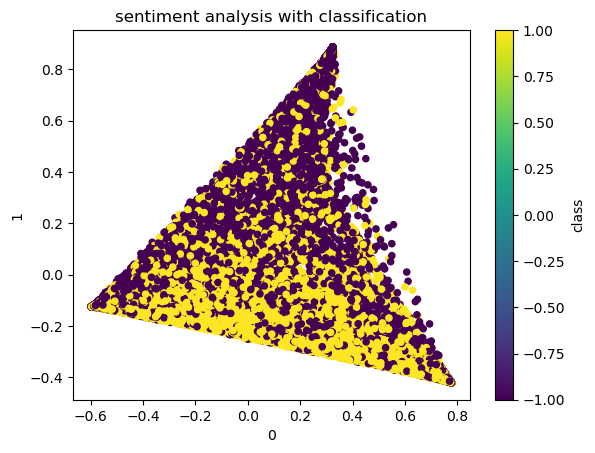

In [90]:
SentimentPCA.plot.scatter(x=0,y=1,c="class")
plt.title("sentiment analysis with classification")
plt.show()

In [91]:
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
#ax.scatter(SentimentPCA[0], SentimentPCA[1], SentimentPCA[2], c = SentimentPCA["class"])
#plt.show()

In [97]:
ViolentSentiment = SentimentAnalysis.loc[MovieClassif[MovieClassif["Prediction"] == 1].index]
PeacefulSentiment = SentimentAnalysis.loc[MovieClassif[MovieClassif["Prediction"] == -1].index]

In [98]:
ViolentSentiment.head()

,name,sadness,joy,love,anger,fear,surprise
Wikipedia movie ID,,,,,,,
975900,Ghosts of Mars,0.166889,0.007635,0.003000,0.104745,0.714015,0.003717
156558,Baby Boy,0.382242,0.013167,0.001626,0.588319,0.014060,0.000586
4951456,Kinjite: Forbidden Subjects,0.003949,0.003649,0.000696,0.107138,0.882647,0.001922
1369204,Juarez,0.009047,0.005366,0.001279,0.491890,0.491027,0.001391
2647998,The Human Tornado,0.001288,0.001801,0.000373,0.978594,0.017586,0.000357


In [99]:
nameViolent = ViolentSentiment.name
ViolentSentiment.reset_index(inplace=True)
ViolentSentiment.drop(["Wikipedia movie ID","name"],axis=1,inplace=True)
ViolentSentiment.head()

,sadness,joy,love,anger,fear,surprise
0,0.166889,0.007635,0.003000,0.104745,0.714015,0.003717
1,0.382242,0.013167,0.001626,0.588319,0.014060,0.000586
2,0.003949,0.003649,0.000696,0.107138,0.882647,0.001922
3,0.009047,0.005366,0.001279,0.491890,0.491027,0.001391
4,0.001288,0.001801,0.000373,0.978594,0.017586,0.000357


In [100]:
namePeaceful = PeacefulSentiment.name
PeacefulSentiment.reset_index(inplace=True)
PeacefulSentiment.drop(["Wikipedia movie ID","name"],axis=1,inplace=True)
PeacefulSentiment.head()

,sadness,joy,love,anger,fear,surprise
0,0.998778,0.000179,0.000163,0.000604,0.000173,0.000103
1,0.019706,0.323026,0.174988,0.456798,0.023313,0.002169
2,0.002686,0.973673,0.001442,0.018248,0.003304,0.000647
3,0.004763,0.020468,0.001466,0.940197,0.032105,0.001001
4,0.001468,0.000447,0.000247,0.987566,0.010084,0.000189


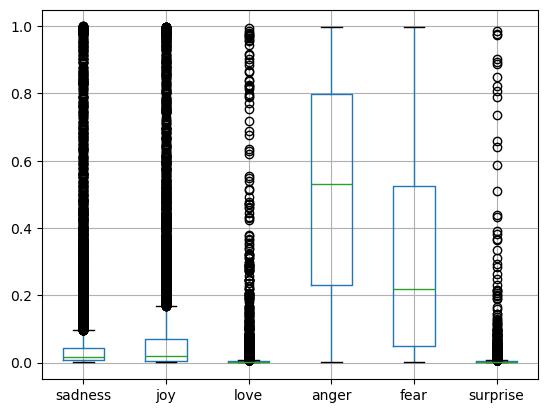

In [101]:
ViolentSentiment.boxplot()
plt.show()

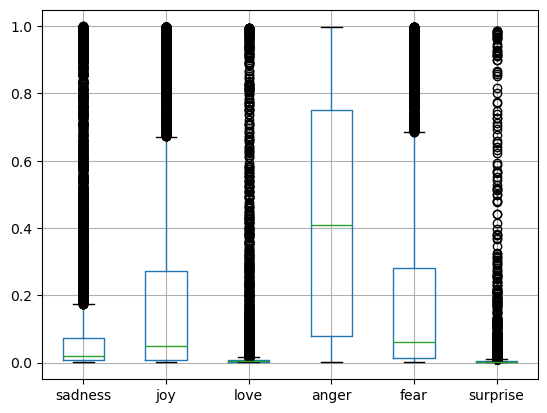

In [102]:
PeacefulSentiment.boxplot()
plt.show()

### here we format for flourish ! Yes, I agree, it is a weird format

In [103]:
ViolentSentiment = ViolentSentiment.add_suffix(' Violence')
PeacefulSentiment = PeacefulSentiment.add_suffix(' Peaceful')

In [104]:
ViolentSentiment.index = nameViolent
PeacefulSentiment.index = namePeaceful

In [105]:
ViolentSentiment.shape[0]+PeacefulSentiment.shape[0] == MovieClassif.shape[0]

True

In [106]:
DatasetFlourish = pd.DataFrame(columns=["Movie name","Score","Sentiment"],index=np.linspace(0,MovieClassif.shape[0]*6-1,MovieClassif.shape[0]*6))
DatasetFlourish.head()

,Movie name,Score,Sentiment
0.0,NaN,NaN,NaN
1.0,NaN,NaN,NaN
2.0,NaN,NaN,NaN
3.0,NaN,NaN,NaN
4.0,NaN,NaN,NaN


In [107]:
filled = 0
for dataset in [ViolentSentiment,PeacefulSentiment] :
    lendataset = dataset.shape[0]
    for col in dataset.columns :
        DatasetFlourish.loc[filled:(filled+lendataset-1), "Score"] = dataset[col].tolist()
        DatasetFlourish.loc[filled:(filled+lendataset-1), "Movie name"] = dataset.index
        DatasetFlourish.loc[filled:(filled+lendataset-1), "Sentiment"] = col
        filled += lendataset

DatasetFlourish.head()

,Movie name,Score,Sentiment
0.0,Ghosts of Mars,0.166889,sadness Violence
1.0,Baby Boy,0.382242,sadness Violence
2.0,Kinjite: Forbidden Subjects,0.003949,sadness Violence
3.0,Juarez,0.009047,sadness Violence
4.0,The Human Tornado,0.001288,sadness Violence
...,...,...,...
102379.0,Coming to America,0.189278,surprise Peaceful
102380.0,The Brother from Another Planet,0.002483,surprise Peaceful
102381.0,Inspiration,0.000926,surprise Peaceful
102382.0,State and Main,0.001627,surprise Peaceful


In [116]:
filled = 0
for sentiment in range(0,6) :
    for dataset in [ViolentSentiment,PeacefulSentiment] :
        lendataset = dataset.shape[0]
        DatasetFlourish.loc[filled:(filled+lendataset-1), "Score"] = dataset.iloc[:, sentiment].tolist()
        DatasetFlourish.loc[filled:(filled+lendataset-1), "Movie name"] = dataset.index
        DatasetFlourish.loc[filled:(filled+lendataset-1), "Sentiment"] = dataset.columns[sentiment]
        filled += lendataset

DatasetFlourish.head()

,Movie name,Score,Sentiment
0.0,Ghosts of Mars,0.166889,sadness Violence
1.0,Baby Boy,0.382242,sadness Violence
2.0,Kinjite: Forbidden Subjects,0.003949,sadness Violence
3.0,Juarez,0.009047,sadness Violence
4.0,The Human Tornado,0.001288,sadness Violence


In [117]:
DatasetFlourish.to_csv(clean+"/sentiment_result/sentiment_flourish.csv")